# EDA for the Ninapro DB 8

In [1]:
import h5py
import os
import scipy.io
from collections import Counter
import matplotlib.pyplot as plt
import logging
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
from scipy import signal
from tqdm import tqdm
from scipy.fft import fft, fftfreq, rfft, rfftfreq
import numpy as np
import librosa


pd.set_option('display.max_rows', 1000)


In [146]:
mask = emg_df['stimulus']==3


10

In [2]:
COLOR_DICT = {'midnight_blue': '#2c3e50', 'pomgrenate': '#c0392b', 
              'green_sea': '#16a085',
              'wisteria': '#8e44ad', 'orange': '#f39c12', 'grey': '#7f8c8d',
             'pumpkin': '#d35400', 'turquoise': '#1abc9c', 'nasu':'#5f27cd', 'lotus':'#f368e0'}


In [3]:
def parse_mat_file_to_dict(filepath):
    data = {}
    f = h5py.File(filepath, 'r')
    for k, v in f.items():
        data[k] = np.array(v)
    return f, data

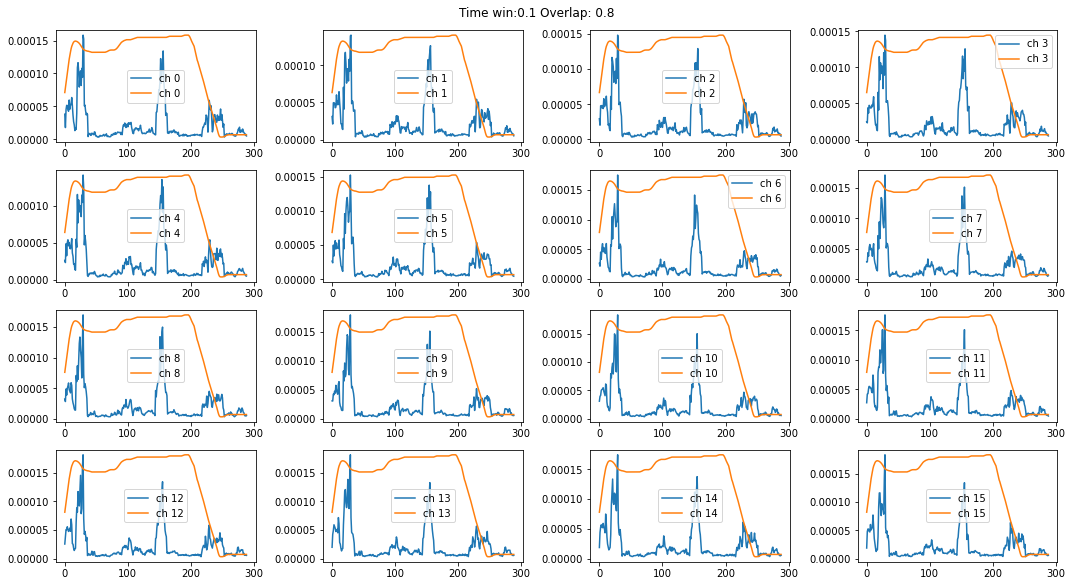

In [141]:
time_win = 0.10
overlap = 0.80
df = pd.read_hdf(f'data/preprocessed/emg_rms_win_{time_win}_overlap_{overlap}.h5')  


gs = gridspec.GridSpec(nrows= 5, ncols=4)
fig = plt.figure(figsize=(15,10))
mask = df['repetition']==1


for ch in range(16):
    ax = fig.add_subplot(gs[ch])
    scaler = MinMaxScaler(feature_range=(df[mask][ch].min(), df[mask][ch].max()))
    glove_rescaled = scaler.fit_transform(df[mask]['glove'].to_numpy().reshape(-1,1))
    ax.plot(df[mask][ch], label=f'ch {ch}')
    ax.plot(glove_rescaled, label=f'ch {ch}')


#     plt.plot(df[mask]['glove'])
    ax.legend()
fig.suptitle(f"Time win:{time_win} Overlap: {overlap}")
plt.tight_layout()

# plt.figure()
# plt.plot(df[mask]['glove'])

In [127]:
df['glove'].shape

(607,)

In [130]:
from sklearn.preprocessing import MinMaxScaler




(607, 1)

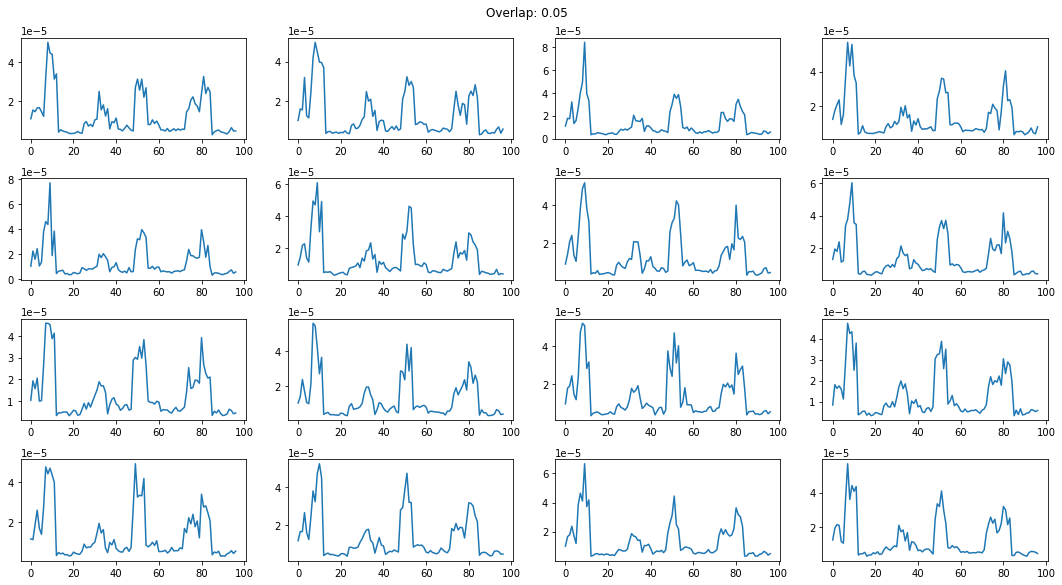

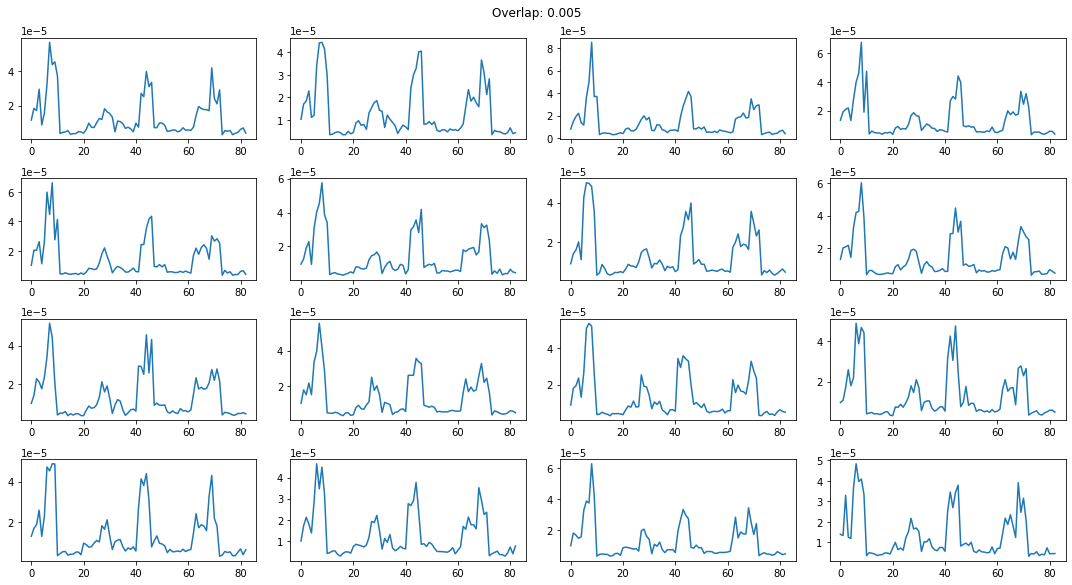

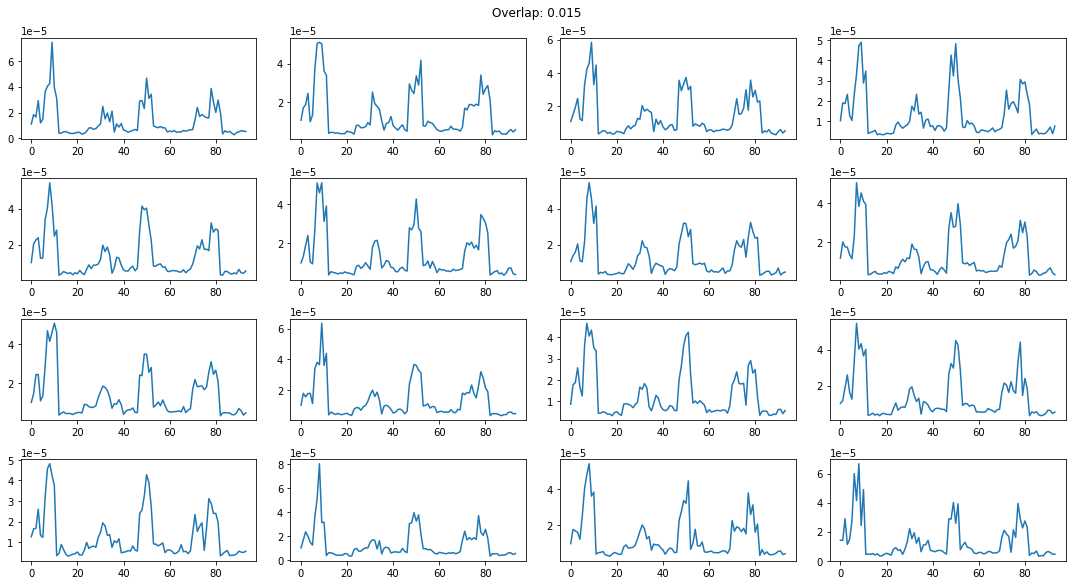

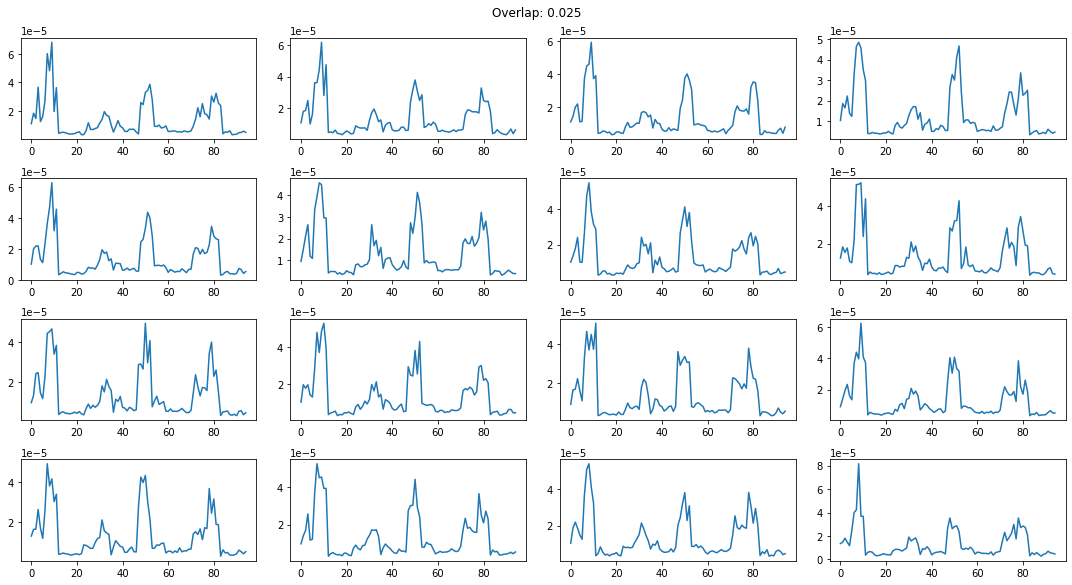

In [110]:
# load hdf5 
for overlap in [0.05, 0.005, 0.015,0.025]:
    df = pd.read_hdf(f'data/preprocessed/emg_rms_win_0.1_overlap_{overlap}.h5')  


    gs = gridspec.GridSpec(nrows= 5, ncols=4)
    fig = plt.figure(figsize=(15,10))
    mask = df['repetition']==9


    for ch in range(16):
        ax = fig.add_subplot(gs[ch])
        ax.plot(df[mask][ch])

#     plt.plot(df[mask]['glove'])
    fig.suptitle(f"Overlap: {overlap}")
    plt.tight_layout()


/opt/anaconda3/envs/snn/lib/python3.8/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

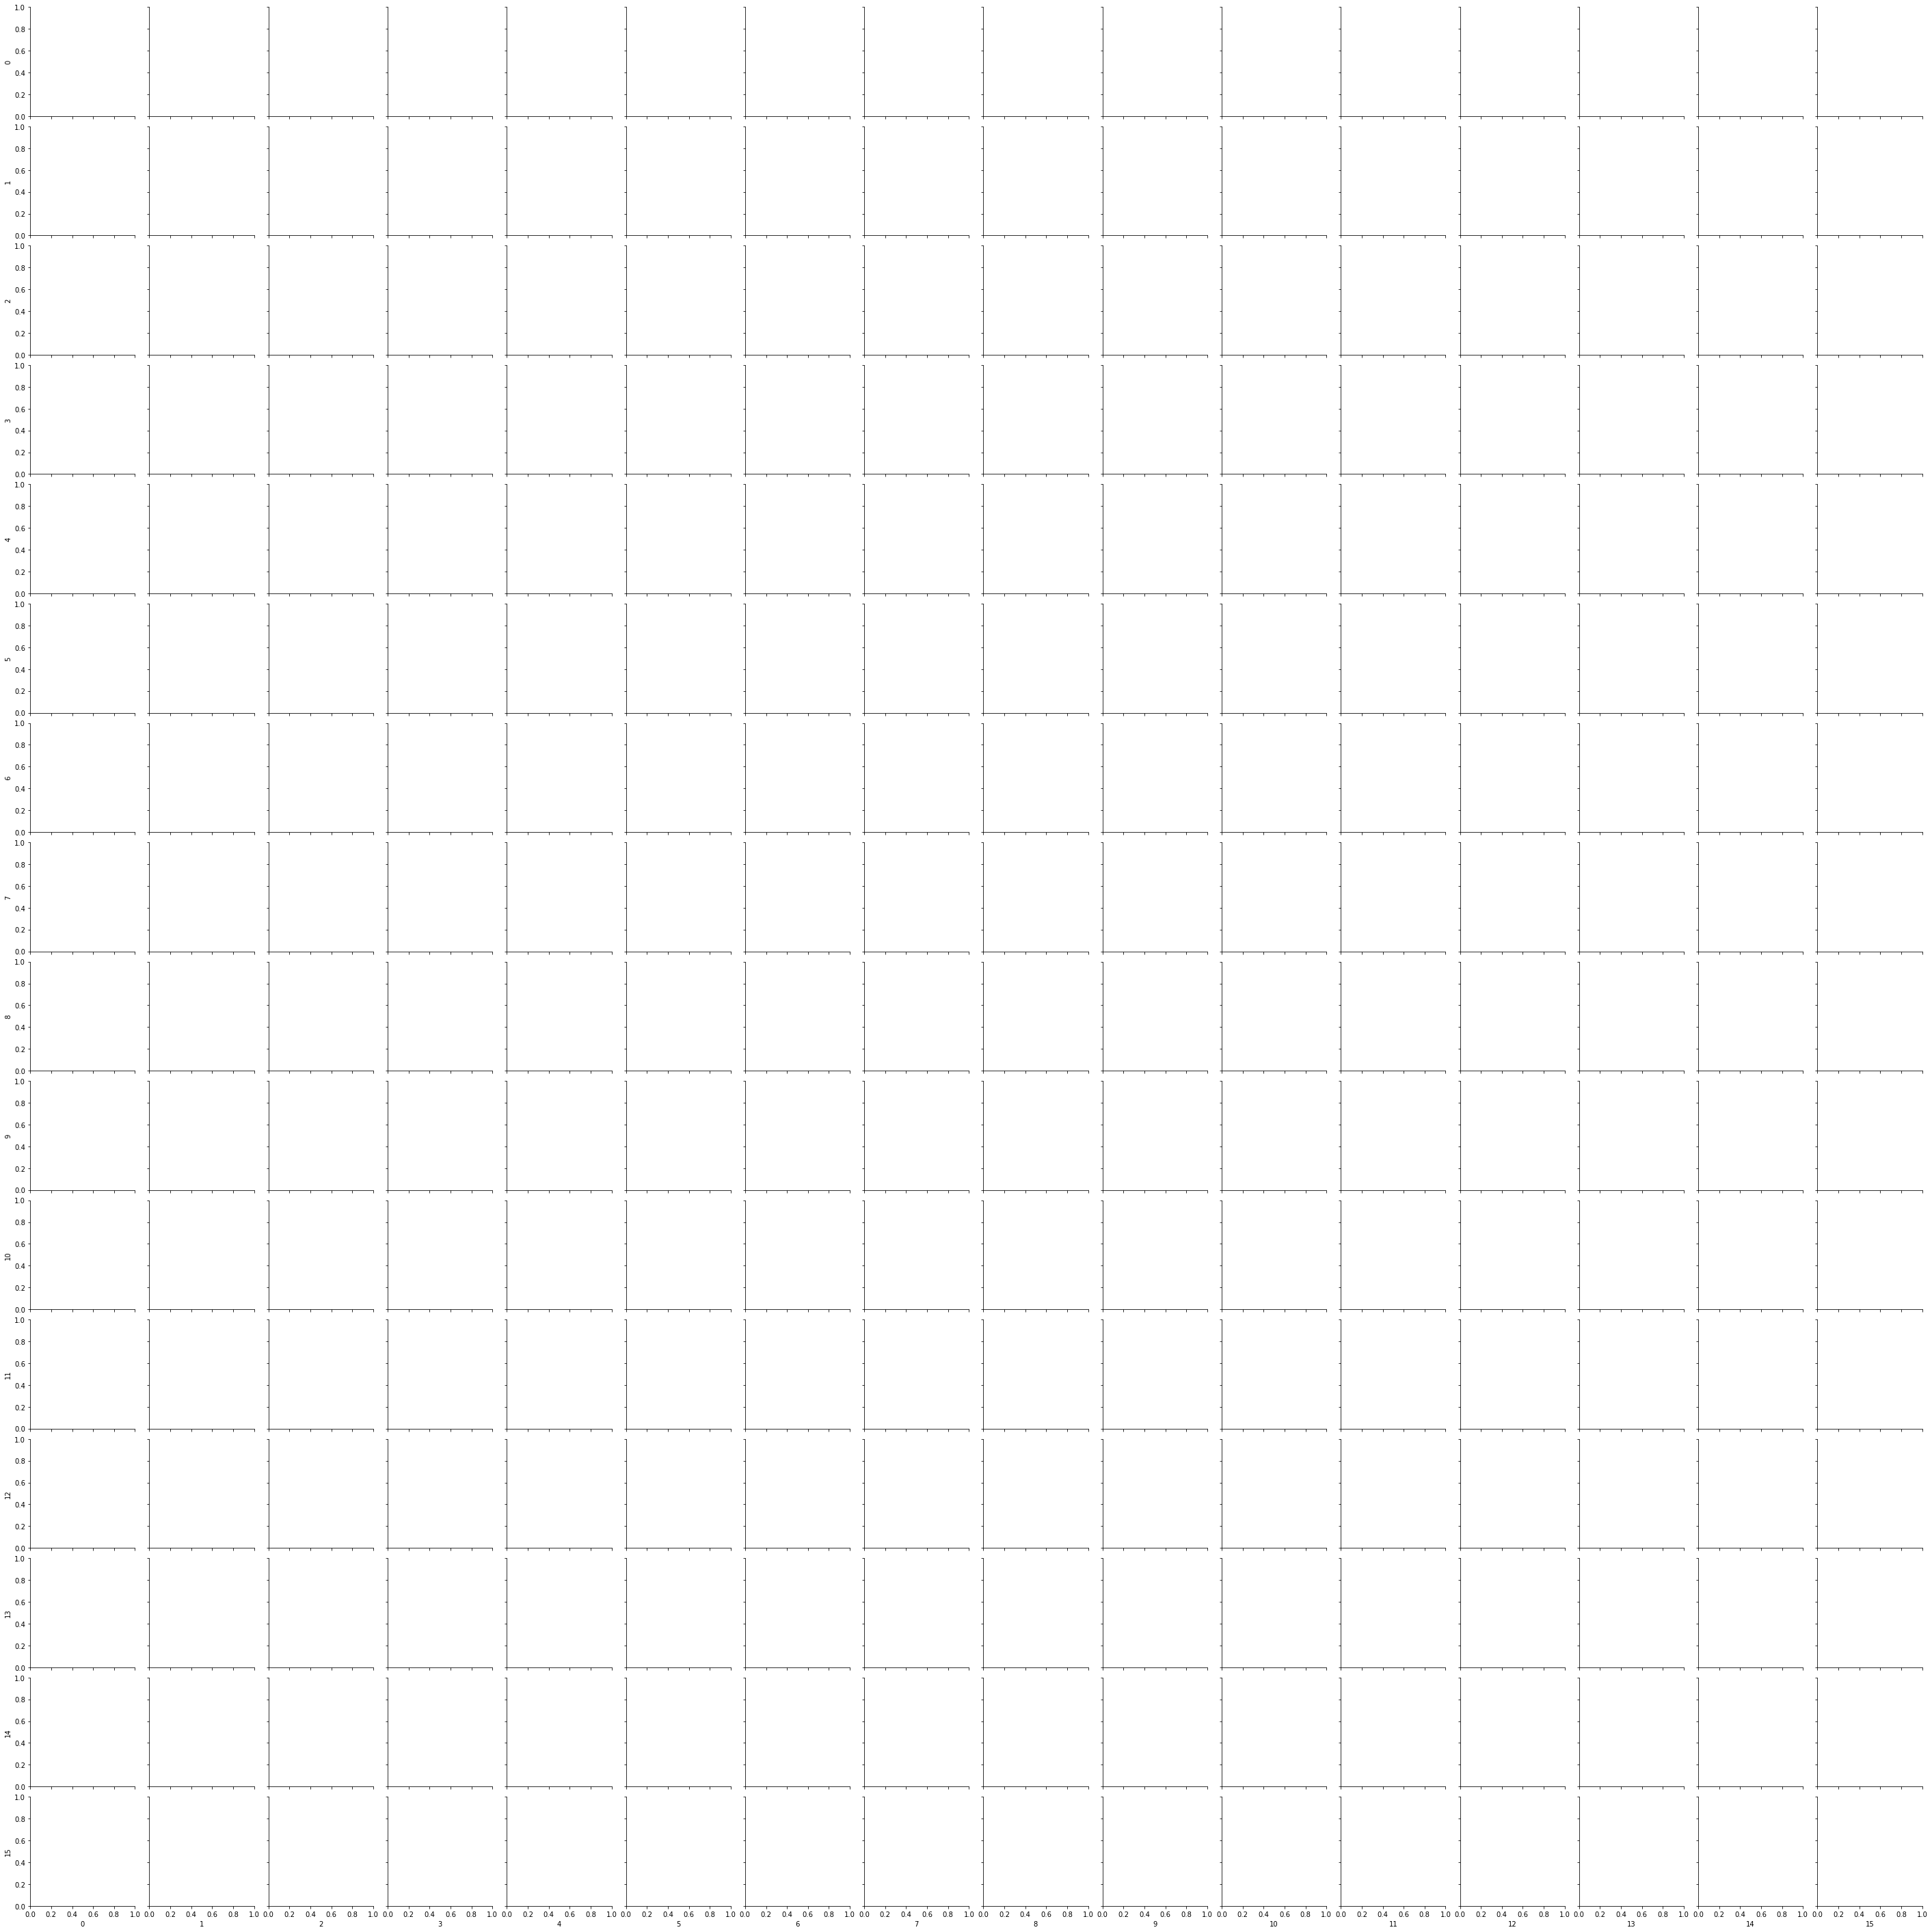

In [115]:
sns.pairplot(df.iloc[:,:16])

# Loading Dataset

In [4]:
data_dir = 'data/'
subject = 1
subject_dataset = 1
subject_file = f'S{subject}_E1_A{subject_dataset}.mat'  #S1_E1_A1.mat
mat = scipy.io.loadmat(os.path.join(data_dir,subject_file))

In [5]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 06 15:23:01 2018',
 '__version__': '1.0',
 '__globals__': [],
 'subject': array([[1]], dtype=uint8),
 'exercise': array([[1]], dtype=uint8),
 'emg': array([[-1.2213888e-05,  1.2848358e-05,  1.4171899e-06, ...,
          2.4547974e-06, -3.5635583e-07,  3.9899796e-06],
        [-1.1034591e-05,  1.1959419e-05, -8.0825924e-07, ...,
          7.5772382e-06, -7.6994631e-08,  9.7154589e-06],
        [-5.5595945e-07,  1.0261851e-05, -9.0351966e-07, ...,
          9.7515685e-06, -2.5459797e-06,  6.3704433e-06],
        ...,
        [-3.5108628e-06, -1.2804191e-05,  1.3349400e-06, ...,
         -3.4621539e-07, -2.2962845e-06,  1.2677652e-06],
        [-9.1614737e-07, -1.4396191e-05,  3.9385824e-07, ...,
         -1.8846814e-06, -2.8121669e-06,  1.2581410e-07],
        [ 8.8349225e-08, -1.3151894e-05, -2.0248261e-07, ...,
         -2.3238319e-06, -3.3372892e-06,  1.1472472e-07]], dtype=float32),
 'acc': array([[ 0.967795

# Dataset Description

### Acquisition
For each participant, three datasets were collected: 
- the first two datasets (acquisitions 1 & 2) comprised **10 repetitions of each movement** and the third dataset (acquisition 3) comprised only two repetitions. 

The variables included in the .mat files are the following:
- subject: subject number
- exercise: exercise number (value set to 1 in all data files)
- emg (16 columns): sEMG signals from the 16 sensors
- acc (48 columns): three-axis accelerometer data from the 16 sensors
- gyro (48 columns): three-axis gyroscope data from the 16 sensors
- mag (48 columns): three-axis magnetometer data from the 16 sensors
- glove (18 columns): calibrated signals from the 18 sensors of the Cyberglove
- stimulus (1 column): the movement repeated by the subject
- restimulus (1 column): again the movement repeated by the subject. In this case, the duration of the movement label is refined a-posteriori in order to correspond to the real movement.
- repetition (1 column): repetition number of the stimulus
- rerepetition (1 column): repetition number of restimulus


### Sampling frequency and Preprocessing
- The muscular activity was recorded using 16 active double-differential wireless sensors from a Delsys Trigno IM Wireless EMG system. The sensors comprise EMG electrodes and 9-axis inertial measurement units (IMUs). The sensors were positioned in two rows of eight units around the participants’ right forearm in correspondence to the radiohumeral joint (see pictures below). No specific muscles were targeted. The sensors were fixed on the forearm using the standard manufacturer-provided adhesive bands. 
- Moreover, a hypoallergenic elastic latex-free band was placed around the sensors to keep them fixed during the acquisition. 
- Sampling rate:
    - **The sEMG signals were sampled at a rate of 1111 Hz**, 
    - **accelerometer and gyroscope data were sampled at 148 Hz**
    - **magnetometer data were sampled at 74 Hz**. 
    - **All signals were upsampled to 2 kHz and post-synchronized.**
    
### Recorded target (i.e hand movements)
- During the acquisition, the subjects were asked to repeat 9 movements using both hands (bilateral mirrored movements). 
- The duration of each of the nine movements varied between **6 and 9 seconds** and consecutive trials were interleaved with **3 seconds of rest**. 
- Each repetition started with the participant holding their fingers at the rest state and involved slowly reaching the target posture as shown on the screen and returning to the rest state before the end of the trial. 

- The following movements were included:
    0. rest
    1. thumb flexion/extension
    2. thumb abduction/adduction
    3. index finger flexion/extension
    4. middle finger flexion/extension
    5. combined ring and little fingers flexion/extension
    6. index pointer
    7. cylindrical grip
    8. lateral grip
    9. tripod grip



# Dataset Insights

In [6]:
print(f"EMG data:{mat['emg'].shape}\nGlove data:{mat['glove'].shape} \nacc data:{mat['acc'].shape}")
print(f"\nstimulus data:{mat['stimulus'].shape} \nrestimulus data:{mat['restimulus'].shape}")
print(f"\nrepetition data:{mat['repetition'].shape} \nrerepetition data:{mat['rerepetition'].shape}")


print(f"Rerepetition value count:\n{Counter(mat['rerepetition'][:,0])}")
Counter(mat['restimulus'][:,0])

EMG data:(2292526, 16)
Glove data:(2292526, 18) 
acc data:(2292526, 48)

stimulus data:(2292526, 1) 
restimulus data:(2292526, 1)

repetition data:(2292526, 1) 
rerepetition data:(2292526, 1)
Rerepetition value count:
Counter({1: 291411, 6: 235135, 4: 231914, 8: 225229, 10: 224936, 2: 219693, 3: 216540, 5: 215265, 9: 213469, 7: 209056, 0: 9878})


Counter({0: 1188175,
         1: 82564,
         2: 93842,
         3: 160468,
         4: 120850,
         5: 112737,
         6: 88592,
         7: 175325,
         8: 120336,
         9: 149637})

- sEMG has 16 channels.
- 'rerepetition' variable defines the number of trial per movement.
- 'restimulus' defines the target gesture to be performed by subject. This variable takes in a value from 0 to 9 representing the 10 classes of gestures + rest

In [7]:
Counter(mat['stimulus'][:,0])

Counter({0: 796495,
         1: 139161,
         2: 141287,
         3: 168908,
         4: 147710,
         5: 147201,
         6: 147253,
         7: 218899,
         8: 181869,
         9: 203743})

In [8]:
FS = 2000
N_CH = mat['emg'].shape[1]

rec_duration = mat['emg'].shape[0]/FS
rec_time = np.arange(0,rec_duration, 1/FS)
print(f"Total recording duration for this subject {subject}: {rec_duration} seconds")
print(f"Creating time axis: \nbeg {rec_time[:5]} \nend {rec_time[-5:]}\n")
print(f"sEMG Channels: {N_CH}")

Total recording duration for this subject 1: 1146.263 seconds
Creating time axis: 
beg [0.     0.0005 0.001  0.0015 0.002 ] 
end [1146.2605 1146.261  1146.2615 1146.262  1146.2625]

sEMG Channels: 16


In [9]:
# loading into df for easier handling
emg_df = pd.DataFrame(mat['emg'])
emg_df['time'] = rec_time
emg_df['restimulus'] = mat['restimulus']
emg_df['rerepetition'] = mat['rerepetition']
emg_df['trial'] = (emg_df['restimulus'] != emg_df['restimulus'].shift()).cumsum()

emg_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,time,restimulus,rerepetition,trial
0,-1.221389e-05,0.000013,1.417190e-06,-1.450381e-06,8.927418e-07,1.276400e-06,-0.000004,-2.097067e-06,-1.083111e-05,-0.000002,-1.004354e-06,-1.922719e-06,2.320445e-06,2.454797e-06,-3.563558e-07,3.989980e-06,0.0000,0,1,1
1,-1.103459e-05,0.000012,-8.082592e-07,-2.964917e-06,1.620494e-06,1.319671e-07,-0.000002,-2.095100e-06,-7.260927e-06,-0.000001,2.537384e-06,-4.171008e-07,1.630039e-06,7.577238e-06,-7.699463e-08,9.715459e-06,0.0005,0,1,1
2,-5.559594e-07,0.000010,-9.035197e-07,-8.051478e-07,1.478138e-06,-3.573351e-06,-0.000002,-2.915417e-07,-9.740975e-06,0.000005,6.192121e-06,3.181949e-06,-3.058749e-06,9.751569e-06,-2.545980e-06,6.370443e-06,0.0010,0,1,1
3,4.855902e-06,0.000007,-9.693842e-07,1.651934e-07,2.062703e-06,-5.654433e-06,-0.000003,5.621391e-07,-1.075601e-05,0.000007,5.304991e-06,4.584006e-06,-4.873819e-06,9.570110e-06,-3.513715e-06,3.834101e-06,0.0015,0,1,1
4,3.194906e-06,0.000004,-1.149470e-06,7.105700e-07,6.009558e-06,-5.201861e-06,-0.000006,-2.785616e-07,-1.131153e-05,0.000005,-7.471688e-07,3.766795e-06,-3.386660e-06,7.087386e-06,-2.335792e-06,2.740356e-06,0.0020,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292521,-1.127882e-05,-0.000025,2.190676e-06,-5.886192e-07,1.549841e-06,-1.165227e-05,0.000003,9.473919e-07,-1.939085e-05,0.000004,3.950131e-06,-1.714167e-06,2.530184e-06,-2.106380e-09,5.636092e-07,-1.418455e-06,1146.2605,0,0,181
2292522,-6.902535e-06,-0.000018,1.813184e-06,-4.670166e-07,-3.907485e-07,-9.584307e-06,0.000004,2.487363e-06,2.300774e-06,0.000006,4.020597e-06,2.761341e-06,3.356033e-07,-1.966260e-07,-1.343064e-06,3.686060e-07,1146.2610,0,0,181
2292523,-3.510863e-06,-0.000013,1.334940e-06,-3.808959e-07,-3.913534e-07,-6.570054e-06,0.000005,4.334066e-06,1.173969e-05,0.000008,3.105642e-06,4.143712e-06,-1.022695e-06,-3.462154e-07,-2.296284e-06,1.267765e-06,1146.2615,0,0,181
2292524,-9.161474e-07,-0.000014,3.938582e-07,-3.770580e-07,2.255342e-06,-3.746801e-06,0.000004,6.020050e-06,5.710281e-07,0.000010,5.021560e-07,2.347920e-06,-1.288560e-06,-1.884681e-06,-2.812167e-06,1.258141e-07,1146.2620,0,0,181


## EMG Summary statistics

In [10]:
df = emg_df.iloc[:,:N_CH]  # shorthand for extracting only channel columns
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06,2.292526e+06
mean,8.891743e-11,5.902483e-11,5.352779e-11,7.313317e-11,-2.131575e-11,1.968766e-12,6.985335e-11,-2.796358e-11,5.736444e-10,5.324235e-11,5.865085e-11,-1.054768e-10,-3.212092e-11,6.646413e-11,-8.402531e-11,-7.183065e-11
std,3.348880e-05,4.650078e-05,5.030264e-06,4.326532e-06,1.287338e-05,4.067726e-05,1.284157e-05,1.564372e-05,5.281475e-05,1.289586e-05,5.528081e-06,7.244788e-06,3.854335e-05,2.641320e-05,1.139786e-05,1.529601e-05
min,-9.152096e-04,-1.942183e-03,-9.207383e-05,-5.414639e-05,-6.541168e-04,-1.144917e-03,-2.693658e-04,-4.631332e-04,-1.069842e-03,-3.568869e-04,-4.717583e-05,-2.395028e-04,-1.448422e-03,-7.321497e-04,-4.722421e-04,-5.471918e-04
25%,-8.689720e-06,-1.030367e-05,-2.722290e-06,-2.621792e-06,-3.740070e-06,-6.066401e-06,-4.344834e-06,-3.680546e-06,-1.786695e-05,-6.242565e-06,-3.551784e-06,-3.801563e-06,-6.066122e-06,-6.318473e-06,-3.056872e-06,-3.726380e-06
50%,1.263319e-06,2.048797e-06,9.961008e-08,1.478265e-08,2.681778e-07,2.058363e-07,-4.720841e-08,1.955004e-07,2.135691e-06,-1.695828e-07,-1.331704e-07,-1.532317e-07,-3.739281e-07,5.401074e-07,8.022545e-08,2.166049e-07
75%,1.028583e-05,1.559764e-05,2.891269e-06,2.660285e-06,4.509030e-06,7.364235e-06,4.431626e-06,3.984501e-06,2.169075e-05,6.256900e-06,3.446276e-06,3.686605e-06,4.926790e-06,8.412376e-06,3.326114e-06,4.091869e-06
max,5.866060e-04,1.272647e-03,8.314147e-05,4.091724e-05,5.052245e-04,9.690431e-04,2.704328e-04,4.218504e-04,6.151334e-04,3.195293e-04,6.285966e-05,2.030292e-04,1.858117e-03,4.854359e-04,3.069094e-04,6.572311e-04


In [ ]:
ch_mean = df.mean()
ch_std = df.std()


fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(ncols=2, nrows=1)
ax = fig.add_subplot(gs[0])

df.mean().plot(kind='bar', legend=True, ax= ax, title="Mean EMG Amplitudes")
plt.xlabel('Channels')

ax = fig.add_subplot(gs[1])
ch_mean.plot(yerr=ch_std, kind='bar', title='Std EMG Amplitudes')
plt.xlabel('Channels');

# ch_mean.plot(kind = "barh", y = "mean", legend = False,
#         title = "Average Prices", xerr = "std")

There is a high variance across the channels but also for a single channel between the different gestures

### Gestures Duration

In [ ]:
# The first time a new gesture is introduced: i.e time for all trials per gesture
# Adjust the last restimulus duration
gesture_first_time = emg_df.groupby('restimulus').first()['time'] 
gestures_duration = gesture_first_time.diff().shift(-1)
gestures_duration[9] = emg_df.groupby('restimulus').last()['time'][9] - emg_df.groupby('restimulus').first()['time'][9]

fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(nrows=1, ncols=3)
ax = fig.add_subplot(gs[0])
gesture_first_time.plot(kind='barh', title="Start time of first repetition per gesture", ax= ax)


ax = fig.add_subplot(gs[1])
gestures_duration.plot(kind='bar', title="Duration of each gesture (all repetitions inc. Rest )", ax= ax,
                      ylabel='Time [sec]', xlabel='restimulus')


print(f'Duration of each gesture\n{gestures_duration}')

ax = fig.add_subplot(gs[2])
exact_stim_duration = emg_df.groupby(['restimulus','trial'])['time'].last() - emg_df.groupby(['restimulus','trial'])['time'].first()
exact_stim_duration.groupby('restimulus').mean().plot.bar(title='Avg. Duration per stimulus', ylabel='Time [sec]');

**Interpretation**
- Rest (0) is the first movement, it takes 9.947 seconds then all repetitions of gesture 1 are performed which take 113.44 seconds and so on.
- **Note** that Rest trials are interleaved between the gestures, so the duration of rest here is that of the first repetition only. Also the reported duration for gestures is that of all repetitions including the rest trials in between the repetitions.

### Mean EMG per gesture

In [ ]:
fig = plt.figure(figsize=(20,9))
ax  = fig.add_subplot()
emg_df.groupby('restimulus')[np.arange(N_CH)].mean().T.plot.bar(ax=ax, ylabel='Mean amplitudes',
                                                               xlabel='Channels',
                                                               color=list(COLOR_DICT.values()),
                                                               linewidth=1,
                                                               width=0.72, rot = 0)

ax.tick_params(axis='both', labelsize=14)
ax.set_ylabel(ylabel='Mean amplitudes',fontsize=18)
ax.set_xlabel(xlabel='Channels',fontsize=18)
ax.legend(ncol=5)
fig.suptitle('Mean EMG amplitude per stimulus', fontsize=20);


In [ ]:
# mean ampltitude per stimulus (should get the same plot as above)
# test = (emg_df.groupby(['restimulus','trial']).mean()).groupby('restimulus')[np.arange(N_CH)].mean()
# test.T.plot.bar()

- Channels are selective of the stimulus. For example channel 8 captures more stimuli 2,4,5,8 and 7.


In [ ]:
# correlation per stimulus
emg_gb_stim = emg_df.groupby('restimulus')[np.arange(N_CH)].mean()
cm = emg_gb_stim.corr()
plt.figure(figsize=(18,9))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title("Channel-wise correlations using mean amplitudes (across all stimuli)", fontsize=15);
plt.xlabel('Channels', fontsize=15)
plt.ylabel('Channels',fontsize=15);

In [ ]:
# correlation between stimulus using mean amplitudes
emg_gb_stim = emg_df.groupby('restimulus')[np.arange(N_CH)].mean().T
stimulus_name = {0: 'rest', 1: 'thumb flex/ext',2: 'thumb ab/ad',
                 3:'index flex/ext' ,
                 4:'mid. flex/ext', 5:'r&l flex/ext',
                 6:'index pointer', 7:'cyl. grip', 8:'lateral grip', 9:'tripod grip'}
cm = emg_gb_stim.corr()
plt.figure(figsize=(18,9))
sns.heatmap(cm, annot=True,xticklabels=stimulus_name.values(), yticklabels=stimulus_name.values())
# plt.title("Correlation between the channels mean amplitudes (across all stimuli)", fontsize=15);
plt.xlabel('Stimulus', fontsize=15)
plt.ylabel('Stimulus',fontsize=15);

In [ ]:
# cm.sort_values(by=[7])

In [ ]:
# quick test
stim_pair = [9,1]
stim_0_test = emg_df[emg_df['restimulus']==stim_pair[0]][np.arange(N_CH)].mean(axis=0)
stim_1_test = emg_df[emg_df['restimulus']==stim_pair[1]][np.arange(N_CH)].mean(axis=0)


np.corrcoef(stim_0_test, stim_1_test)

To compute the stimulus-wise correlation:
- Get the mean of the channels for each stimulus then compute the correlation between the stimuli.

**Observe the following**
1. High correlation between tripod grip and both thumb flexion/extension and index flex/ext. This makes sense since the same fingers are flexed to perform this grip.
2. Surprisingly, rest is also correlated with the grasps.


### Signal Visualization

In [ ]:
# From a single channel

ch = 0

fig = plt.figure(figsize=(20,5))
gs =gridspec.GridSpec(ncols=2, nrows=1)
ax = fig.add_subplot(gs[0])

ax.plot(rec_time, emg_df[ch],color=COLOR_DICT['midnight_blue'], label=f'Ch{ch}')
        
# plt.title('Single channel EMG [entire recording]')
plt.legend()
plt.xlabel('time [s]');
plt.ylabel('amplitude');

ax = fig.add_subplot(gs[1])
sns.lineplot(data=emg_df, x="time", y=0, hue="restimulus",
             palette=sns.color_palette(list(COLOR_DICT.values())))
fig.suptitle('Single channel EMG [entire recording]');

In [ ]:
# single finger movement
finger = 'index flex/ext'
index_finger_id = list(stimulus_name.keys())[list(stimulus_name.values()).index(finger)]
rep = 2

single_df = emg_df[(emg_df['restimulus']==index_finger_id) & (emg_df['rerepetition'] == rep)]
ch = 0
subset_N  = 300000
plt.figure(figsize=(15,9))
sns.lineplot(data=single_df, x="time", y=ch, hue="restimulus", 
             palette=sns.color_palette(list(COLOR_DICT.values()))[:1])
plt.grid(True)
plt.title(f"EMG Channel {ch} Repetition#{rep} for {finger}");


## Glove data

In [11]:
glove_df = pd.DataFrame(mat['glove'])
glove_df['time'] = rec_time
glove_df['restimulus']= mat['restimulus']
glove_df['rerepetition']= mat['rerepetition']
glove_df['trial'] = emg_df['trial']
glove_df['stimulus'] = mat['stimulus']
emg_df['stimulus'] = mat['stimulus']

print(f"Checking on unique restimulus {glove_df[glove_df['rerepetition']==2]['restimulus'].unique()}")
print(f"Checking on id of first repetition per restimulus:\n {glove_df.groupby('restimulus')['rerepetition'].first()}")

Checking on unique restimulus [0 1 2 3 4 5 6 7 8 9]
Checking on id of first repetition per restimulus:
 restimulus
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: rerepetition, dtype: int8


### Tracking Index Finger Marker

In [12]:
glove_df[(glove_df['restimulus']==1) & (glove_df['trial'] == 2)]  
    
glove_df.groupby(['restimulus','trial']).first()

0          1          2          3          4  \
restimulus trial                                                           
0          1       46.587200 -14.424356  22.320053  38.314030  15.359853   
           3       45.655453 -19.591290  24.014174  35.067081   6.719935   
           5       41.928478 -30.786312  21.472992  37.339947   6.719935   
           7       42.860222 -17.868979  23.167112  39.937508  14.399861   
           9       42.860222 -30.786312  18.084747  40.586899  -0.959991   
           11      43.791965 -27.341690  15.543566  40.262203   5.759945   
           13      43.791965 -48.870579  17.237688  36.690556   0.959991   
           15      45.655453 -17.868979  21.472992  39.288116   5.759945   
           17      48.450687 -38.536713  16.390627  32.794212   0.959991   
           19      42.860222 -28.202845  20.625931  36.690556   4.799954   
           21      51.245918 -40.259022  18.084747  29.547262   7.679926   
           23      60.563358 -22.174755  25.708296  38.638725   1.919982   
           25      79.198235 -29.925156  18.931808  36.041164   1.919982   
           27     109.945786 -43.703644  11.308262  21.105186   1.919982   
           29      98.764862 -53.176357  12.155322  29.871956   9.599908   
           31      72.676033 -38.536713  19.778870  38.638725  10.559898   
           33      68.949051 -30.786312  23.167112  37.989338  10.559898   
           35      73.607773 -37.675556  18.931808  36.041164   0.000000   
           37      58.699871 -29.925156  15.543566  40.262203  12.479880   
           39     107.150558 -56.620979   5.378836  28.573175  -2.879972   
           41      69.880798 -27.341690  20.625931  38.314030   6.719935   
           43      46.587200 -60.926758  -0.550590  42.859764  18.239824   
           45      40.064991 -60.926758  -1.397650  43.184460  18.239824   
           47      41.928478 -61.787910   0.296471  44.483238  29.759714   
           49      50.314175 -27.341690  20.625931  35.067081  29.759714   
           51      41.928478 -55.759823   2.837654  45.457325  41.279602   
           53      40.064991 -52.315201   4.531775  43.509155  31.679695   
           55      40.996735 -48.870579   6.225897  42.535069  34.559669   
           57      43.791965 -52.315201   5.378836  43.509155  37.439640   
           59      45.655453 -46.287113   8.767079  42.210373  35.519661   
           61      44.723709 -50.592888  18.931808  39.612812  20.159807   
           63      50.314175 -48.870579   9.614141  41.560982  15.359853   
           65      51.245918 -37.675556  22.320053  40.586899  12.479880   
           67      44.723709 -45.425957   9.614141  43.509155  19.199816   
           69      46.587200 -41.120178  12.155322  41.885677  15.359853   
           71      47.518944 -45.425957  11.308262  43.509155  19.199816   
           73      47.518944 -39.397865  12.155322  42.535069  11.519890   
           75      45.655453 -40.259022  14.696505  40.586899  12.479880   
           77      51.245918 -30.786312  17.237688  38.638725  11.519890   
           79      49.382431 -34.230934  19.778870  36.690556  11.519890   
           81      49.382431 -38.536713  15.543566  37.989338   8.639917   
           83      49.382431 -35.953243  17.237688  39.937508  10.559898   
           85      42.860222 -35.092091  16.390627  40.262203  10.559898   
           87      44.723709 -32.508621  18.084747  37.339947  12.479880   
           89      47.518944 -30.786312  19.778870  35.391773  12.479880   
           91      48.450687 -32.508621  20.625931  34.742386  13.439871   
           93      47.518944 -29.064001  19.778870  36.365860  13.439871   
           95      54.041149 -40.259022  21.472992  34.092995   9.599908   
           97      47.518944 -32.508621  18.931808  36.365860  19.199816   
           99      46.587200 -28.202845  20.625931  33.768299  17.279835   
           101     49.382431 -28.202845  20.625931  36.365860  18.239824   

In [13]:
# manually picking the trial nuumber that would correspond to flex/extend finger
finger = 'index flex/ext'
index_finger_id = list(stimulus_name.keys())[list(stimulus_name.values()).index(finger)]
rep = 42
single_finger_trial = glove_df[(glove_df['restimulus']==index_finger_id) & (glove_df['trial'] == rep)]  

glove_index_ch = 5  # channel 6 is on the index finger joint


plt.figure(figsize=(15,5))
sns.lineplot(data=single_finger_trial, x="time", y=glove_index_ch, hue="restimulus", 
             palette=sns.color_palette(list(COLOR_DICT.values()))[:1])
plt.grid(True)
plt.title(f"Single trial (#{rep}) Glove data for {finger} - Channel# {glove_index_ch}", fontsize=16)
plt.xlabel('time [sec]')


fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0])

for rep in range(1,10):
    index_trial = glove_df[(glove_df['restimulus']==index_finger_id) & (glove_df['rerepetition'] ==rep)][glove_index_ch]
    index_trial.plot(label=f"Trial#{rep}", ax= ax)
plt.legend(ncol=5)
plt.ylabel('Position [a.u.]')
plt.xlabel('time [sec]')
plt.title(f'All Trials Glove data for {finger} - Channel# {glove_index_ch}', fontsize=16)


NameError: name 'stimulus_name' is not defined

In [ ]:
# Checking on a different channel
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax = fig.add_subplot(gs[0])
glove_ch = 4
for rep in range(1,10):
    index_trial = glove_df[(glove_df['restimulus']==index_finger_id) & (glove_df['rerepetition'] ==rep)][glove_ch]
    ax.plot(index_trial, '+', label=f"Trial#{rep}")
plt.legend(ncol=5)
plt.ylabel('Position [a.u.]')
plt.xlabel('time [sec]')
plt.title(f'Glove Channel#{glove_ch}',fontsize=14)



### [Quick Check] Do all the glove channels follow the same trajectory? 

Just to make sure that only the channels related to index finger movement follow the expected trajectory, I plot some channels (i.e markers) on other locations as well.

**Given the markers positionning, I expect channels 4,5 to be similar (since they are placed on index finger).**

In [ ]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

finger = 'index flex/ext'
index_finger_id = list(stimulus_name.keys())[list(stimulus_name.values()).index(finger)]
rep = 42
single_finger_trial = glove_df[(glove_df['restimulus']==index_finger_id) & (glove_df['trial'] == rep)]  



df_reshape = single_finger_trial.melt('time', var_name='ch', value_name='vals')
glove_index_ch= np.arange(4,11)

plt.figure(figsize=(15,7))
df_sel = df_reshape[df_reshape['ch'].isin(glove_index_ch)]
sns.lineplot(x="time", y="vals", hue='ch', data=df_sel,
             palette=sns.color_palette(list(COLOR_DICT.values()))[:len(glove_index_ch)])


plt.xlabel('time [sec]')
plt.ylabel('Position [a.u.]')



## EMG correlate with Glove

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

# time_subset = np.arange(0, 6*)

subset_emg = emg_df[emg_df['restimulus']==3].iloc[:,:N_CH]
subset_glove = glove_df[glove_df['restimulus']==3].iloc[:,5]


fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(nrows=2, ncols=1)

ax = fig.add_subplot(gs[0])
ax.plot(subset_emg)

ax = fig.add_subplot(gs[1])
ax.plot(subset_glove)



## EMG Signal Energy - RMS

In [28]:
index_stim = 3

emg_df.shape

emg_df.columns



Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
               'time',   'restimulus', 'rerepetition',        'trial',
           'stimulus'],
      dtype='object')

In [30]:
emg_df[(emg_df['stimulus']==3) & (emg_df['rerepetition']==0)]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,time,restimulus,rerepetition,trial,stimulus


In [ ]:
emg_df[(emg_df['stimulus']==index_stim) & (emg_df['rerepetition']==rep)].iloc[:,:N_CH]

In [47]:
time_bin_rep = np.linspace(0, (10* 500)/10)
time_bin_rep

array([  0.        ,  10.20408163,  20.40816327,  30.6122449 ,
        40.81632653,  51.02040816,  61.2244898 ,  71.42857143,
        81.63265306,  91.83673469, 102.04081633, 112.24489796,
       122.44897959, 132.65306122, 142.85714286, 153.06122449,
       163.26530612, 173.46938776, 183.67346939, 193.87755102,
       204.08163265, 214.28571429, 224.48979592, 234.69387755,
       244.89795918, 255.10204082, 265.30612245, 275.51020408,
       285.71428571, 295.91836735, 306.12244898, 316.32653061,
       326.53061224, 336.73469388, 346.93877551, 357.14285714,
       367.34693878, 377.55102041, 387.75510204, 397.95918367,
       408.16326531, 418.36734694, 428.57142857, 438.7755102 ,
       448.97959184, 459.18367347, 469.3877551 , 479.59183673,
       489.79591837, 500.        ])

In [90]:
mask = (emg_df['stimulus'] == index_stim) & (emg_df['rerepetition']==rep)
glove_df[mask].iloc[:,0]

474945    55.904636
474946    55.904636
474947    55.904636
474948    55.904636
474949    55.904636
            ...    
490703    46.587200
490704    46.587200
490705    46.587200
490706    46.587200
490707    46.587200
Name: 0, Length: 15763, dtype: float32

In [78]:
def get_rms_for_trial(emg_df, glove_df, time_window, overlap, FS, rep, index_stim=3):
    
    

    time_win_samples = int(time_window * FS)
    
    index_glove = glove_df[(glove_df['stimulus']==index_stim) &  (glove_df['rerepetition']==rep)].iloc[:,5]
    index_emg = emg_df[(emg_df['stimulus']==index_stim) & (emg_df['rerepetition']==rep)].iloc[:,:N_CH]
    


    
    n_win = int((emg_df.shape[0] - time_win_samples)/ (overlap *index_emg.shape[0]))
    print(f"n_win:{n_win}, n_samples:{time_win_samples}")
    time_bin_rep = np.linspace(0, (n_win* time_win_samples)/FS,num=n_win) #np.arange(0,(n_win* time_win_samples)/FS, 1/FS)


#     n_reps = emg_df[(emg_df['stimulus']==index_stim)]['rerepetition'].unique()




#     rep_emg = index_emg[index_emg['rerepetition']==rep].iloc[:,:N_CH]
#     rep_glove = index_glove[index_glove['rerepetition']==rep].iloc[:,5]


    emg_rms = librosa.feature.rms(y=index_emg.T,frame_length= time_win_samples, center=False,
                         hop_length=int(time_win_samples * overlap))
    
    glove_rms = librosa.feature.rms(y=index_glove.T,frame_length= time_win_samples, center=False,
                         hop_length=int(time_win_samples *overlap)).reshape(-1,1)

#     rep_rms = librosa.feature.rms(y=rep_emg.T,frame_length= time_win_samples, center=False,
#                          hop_length=int(time_win_samples * overlap)).reshape(-1,N_CH)
#     rep_glove_rms = librosa.feature.rms(y=rep_glove.T,frame_length= time_win_samples, center=False,
#                          hop_length=int(time_win_samples *overlap)).reshape(-1,1)

#     rep_temp = np.repeat(rep, rep_rms.shape[0])
    
    return emg_rms, glove_rms, time_bin_rep

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,time,restimulus,rerepetition,trial,stimulus
479241,-1.559876e-05,0.000018,-7.101012e-07,-2.223850e-07,3.598784e-07,-0.000002,-1.941672e-06,-1.633384e-07,-1.665145e-05,0.000003,...,3.513408e-06,-5.699877e-07,0.000006,0.000003,-3.330407e-06,239.6205,3,1,42,3
479242,-9.327322e-06,0.000026,1.628887e-06,-1.680371e-06,2.143380e-06,-0.000004,-2.391701e-06,2.808206e-07,-2.775910e-06,0.000012,...,9.966582e-07,-8.579112e-07,0.000004,0.000004,-3.436061e-06,239.6210,3,1,42,3
479243,-1.695511e-06,0.000037,1.636978e-06,-3.515669e-06,7.505535e-06,-0.000002,1.746905e-06,-1.359401e-07,8.912820e-06,0.000007,...,-1.243338e-06,-8.477589e-07,0.000007,0.000004,-2.057534e-06,239.6215,3,1,42,3
479244,5.490324e-06,0.000050,8.116718e-07,-4.230581e-06,1.037325e-05,-0.000002,4.925995e-06,-2.062650e-06,1.881755e-05,0.000004,...,-2.570864e-06,1.309834e-06,0.000011,0.000003,1.737759e-07,239.6220,3,1,42,3
479245,8.669052e-06,0.000067,2.053762e-06,-3.532774e-06,6.325608e-06,-0.000006,7.789336e-06,-4.206035e-06,3.071356e-05,0.000010,...,-2.571998e-07,2.267959e-06,0.000015,0.000003,1.650827e-06,239.6225,3,1,42,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490703,-4.374455e-05,-0.000092,-6.801386e-07,6.082666e-07,4.699602e-06,-0.000007,-2.922956e-07,-9.055606e-06,-2.242630e-06,0.000011,...,-8.542850e-07,1.472352e-05,0.000027,-0.000001,-7.865755e-06,245.3515,3,1,42,3
490704,-3.744552e-05,-0.000105,-3.556598e-06,-6.439972e-07,6.756130e-06,-0.000002,-1.285247e-06,-1.064917e-05,1.978332e-07,0.000010,...,2.642515e-06,7.206065e-07,0.000026,-0.000005,-2.423924e-06,245.3520,3,1,42,3
490705,-2.406924e-05,-0.000100,-4.590345e-06,-2.877321e-06,4.846545e-06,0.000002,1.240348e-06,-9.313605e-06,-3.710063e-06,0.000011,...,2.025380e-06,-6.203588e-06,0.000023,-0.000003,1.625139e-06,245.3525,3,1,42,3
490706,-6.883530e-07,-0.000078,-2.447937e-06,-5.354148e-06,5.000063e-07,0.000005,7.764830e-06,-4.354866e-06,-4.971974e-06,0.000010,...,-2.759633e-07,-4.221608e-06,0.000018,0.000003,5.997812e-06,245.3530,3,1,42,3


n_win:14542, n_samples:256


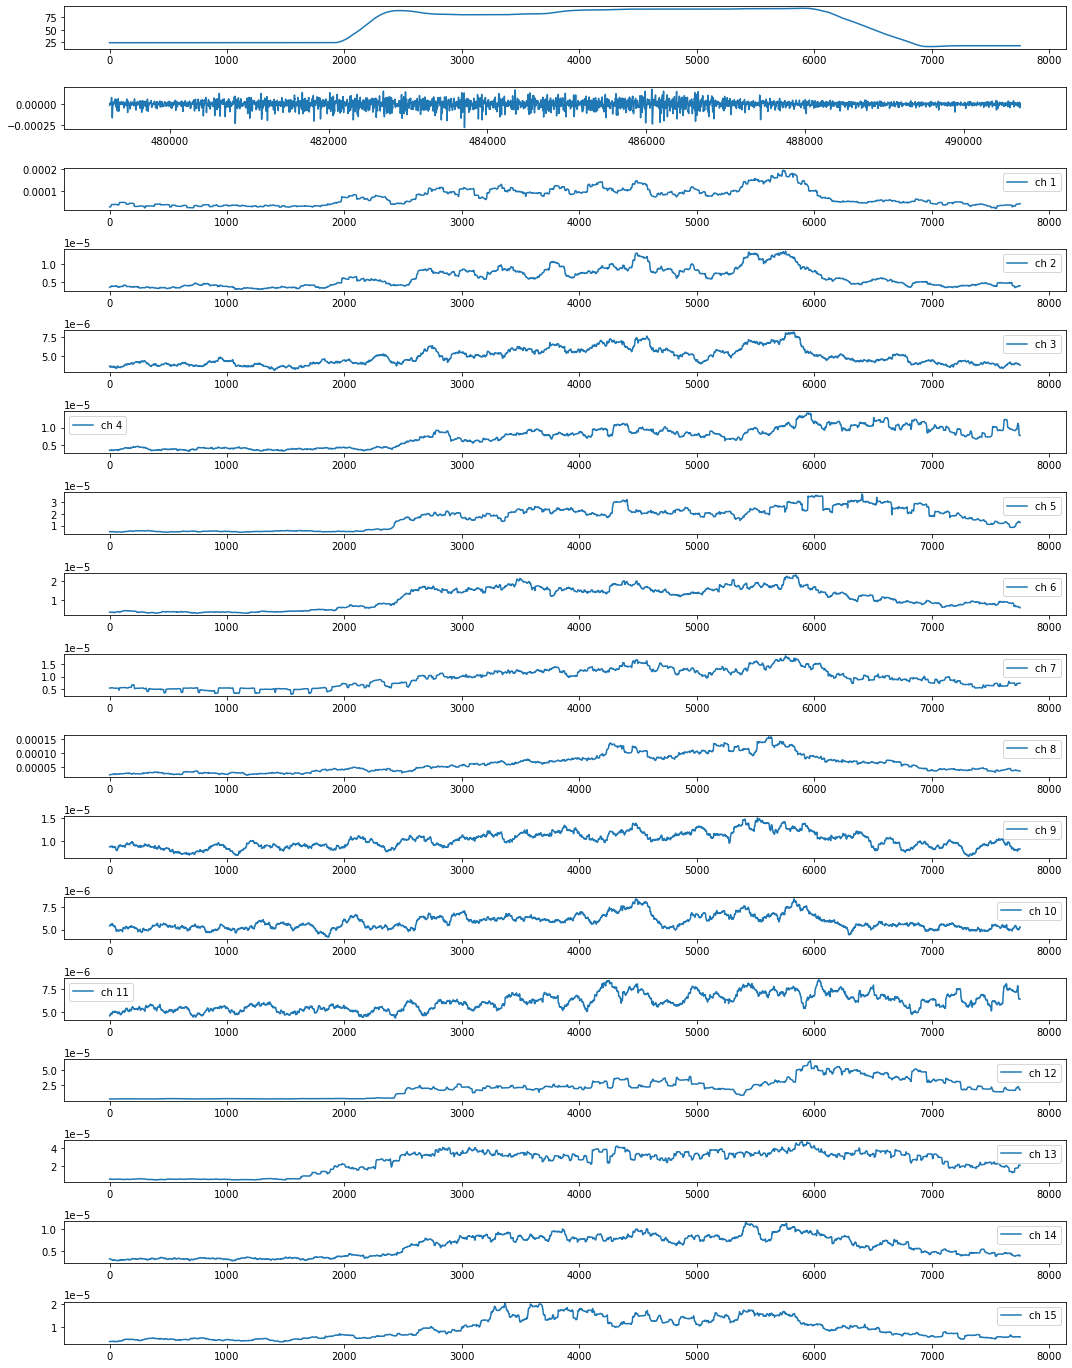

In [87]:
rep = 1
emg_rms, glove_rms, time_bin_rep = get_rms_for_trial(emg_df, glove_df, 0.128, 0.01, FS, rep=rep)

emg_trial = emg_df[(emg_df['restimulus'] == index_stim) & (emg_df['rerepetition'] == rep)]


# time_bin_rep.shape, glove_rms.shape, emg_rms.shape

fig = plt.figure(figsize=(15,20))
gs= gridspec.GridSpec(nrows=18, ncols=1)
ax  = fig.add_subplot(gs[0])

ax.plot(glove_rms)
ax  = fig.add_subplot(gs[1])
ax.plot(emg_trial[0])



for sub in range(2,N_CH+1,1):
    ax  = fig.add_subplot(gs[sub])

    ax.plot(emg_rms[sub-1,0,:], label=f'ch {sub-1}');
    plt.tight_layout()
    plt.legend()

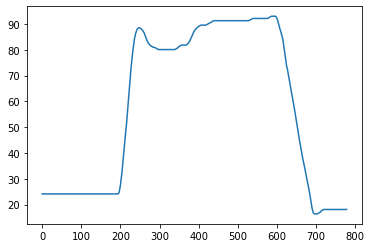

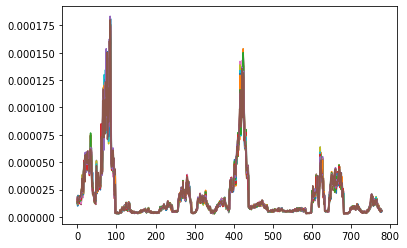

In [56]:

# plt.plot(glove_rms)

In [ ]:
# compute rms per trial

time_window = 0.025 # in seconds
overlap = 0.5 # in percent


time_win_samples = int(time_window * FS)
index_glove = glove_df[glove_df['stimulus']==index_stim]
index_emg = emg_df[(emg_df['stimulus']==index_stim)]




n_reps = emg_df[(emg_df['stimulus']==index_stim)]['rerepetition'].unique()


rms_df = pd.DataFrame()
rep_df = pd.DataFrame()
glove_rms_df = pd.DataFrame()



for row, rep in enumerate(n_reps):
    rep_emg = index_emg[index_emg['rerepetition']==rep].iloc[:,:N_CH]
    rep_glove = index_glove[index_glove['rerepetition']==rep].iloc[:,5]
    
    n_win = int((index_emg.shape[0] - time_win_samples)/ (overlap *rep_emg.shape[0]))



    rep_rms = librosa.feature.rms(y=rep_emg.T,frame_length= time_win_samples, center=False,
                         hop_length=int(time_win_samples * overlap)).reshape(-1,N_CH)
    rep_glove_rms = librosa.feature.rms(y=rep_glove.T,frame_length= time_win_samples, center=False,
                         hop_length=int(time_win_samples *overlap)).reshape(-1,1)
    
    rep_temp = np.repeat(rep, rep_rms.shape[0])
        
    rep_df = pd.concat([rep_df, pd.DataFrame(rep_temp)])
    rms_df = pd.concat([rms_df, pd.DataFrame(rep_rms)])
    glove_rms_df = pd.concat([glove_rms_df, pd.DataFrame(rep_glove_rms)])

glove_rms_df['trial'] = rep_df[0]
rms_df['trial'] = rep_df[0]

In [ ]:
emg_df_single_trial.shape, time_emg_single_trial.shape

In [ ]:
# Visualization
ch = 0
trial = 2
trial_dur = index_emg[(index_emg['stimulus']== index_stim) & (index_emg['rerepetition']==trial)].iloc[:,ch].shape[0]/FS
# time_bin_single_trial = np.arange(0, rms_df[rms_df['trial']==trial].shape[0]/FS, 1/FS)




rms_df_single_trial = rms_df[rms_df['trial']==trial][ch]
glove_df_single_trial = glove_rms_df[glove_rms_df['trial']==trial][0]
emg_df_single_trial = index_emg[(index_emg['stimulus']== index_stim) & (index_emg['rerepetition']==trial)][ch]


emg_df_single_trial
time_bin_single_trial = np.arange(0, (n_win *time_win_samples)/FS , 1/FS)
time_emg_single_trial = np.arange(0,trial_dur, 1/FS)

n_win = int((time_emg_single_trial.shape[0] - time_win_samples)/ (overlap *rep_emg.shape[0]))



# time_emg_single_trial = np.arange(0,index_emg[(index_emg['stimulus']== index_stim) & (index_emg['rerepetition']==trial)].iloc[:,ch].shape[0]/FS, 1/FS)


fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=3, ncols=1)
ax = fig.add_subplot(gs[0])



ax.plot(time_emg_single_trial,emg_df_single_trial, color= COLOR_DICT['pomgrenate'])
plt.ylabel('Amplitude [V]')
plt.grid(False)


ax = fig.add_subplot(gs[1])
ax.plot(time_bin_single_trial, rms_df_single_trial, '+-',color= COLOR_DICT['midnight_blue'])
plt.grid(False)
plt.ylabel('RMS [V]')


ax = fig.add_subplot(gs[2])
ax.plot(time_bin_single_trial, glove_df_single_trial, color= COLOR_DICT['midnight_blue'])
plt.grid(False)
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Position [a.u.]')


fig.suptitle(f"Ch:{ch} Trial#{trial} RMS (non-overlap:{time_window}) s", fontsize=15)



In [ ]:


time_window = 0.025 # in seconds
time_win_samples = int(time_window * FS)
index_emg = emg_df[emg_df['restimulus']==3].iloc[:,:N_CH]
index_glove = glove_df[glove_df['restimulus']==3].iloc[:,:N_CH]

rms = librosa.feature.rms(y=index_emg.T,frame_length= time_win_samples, center=False,
                         hop_length=int(time_win_samples))


rms_df = pd.DataFrame(rms.T.reshape(-1,N_CH))

time_bins= np.arange(0, (index_emg.shape[0]-time_win_samples)/FS,time_window)
print(index_emg.shape, time_bins.shape, rms.shape)


# Visualization
ch = 0
time_emg = np.arange(0,index_emg.shape[0]/FS, 1/FS)


fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=3, ncols=1)
ax = fig.add_subplot(gs[0])
ax.plot(time_bins, rms.T[:,0,ch], color= COLOR_DICT['pomgrenate'])
# ax.plot(rms.T[:,0,ch], color= COLOR_DICT['pomgrenate'])


plt.ylabel('RMS [V]')
plt.grid(False)


ax = fig.add_subplot(gs[1])
ax.plot(time_emg, index_emg[ch], color= COLOR_DICT['midnight_blue'])
plt.grid(False)
fig.suptitle(f"Ch:{ch} RMS with non-overlaping windows {time_window} s", fontsize=15)
plt.ylabel('Amplitude [V]')


ax = fig.add_subplot(gs[2])
ax.plot(time_emg, index_glove[5], color= COLOR_DICT['midnight_blue'])
plt.grid(False)
fig.suptitle(f"Ch:{ch} RMS with non-overlaping windows {time_window} s", fontsize=15)
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Position [a.u.]')



In [ ]:
rms_df.shape

In [ ]:
ch = 0
time_emg = np.arange(0,index_emg.shape[0]/FS, 1/FS)

zoom_time = 0.5
mask_bin = time_bins < zoom_time # in sec
mask_emg = time_emg < zoom_time

fig = plt.figure(figsize=(18,30))

gs = gridspec.GridSpec(nrows=18, ncols=1)

for ch in range(N_CH):
    ax = fig.add_subplot(gs[ch])
    ax.plot(time_bins[mask_bin], rms.T[mask_bin,0,ch], '+-',color= COLOR_DICT['pomgrenate'],
           label=f'ch {ch}')
    plt.ylabel('RMS [V]')
    plt.grid(False)


ax = fig.add_subplot(gs[ch+1])
ax.plot(time_emg[mask_emg], index_emg.to_numpy()[mask_emg,ch], color= COLOR_DICT['midnight_blue'])
plt.grid(False)
fig.suptitle(f"Ch:{ch} RMS with non-overlaping windows {time_window} s", fontsize=15)
plt.ylabel('Amplitude [V]')


ax = fig.add_subplot(gs[ch+2])
ax.plot(time_emg[mask_emg], index_glove.to_numpy()[mask_emg,5],'-', color= COLOR_DICT['midnight_blue'])
plt.grid(False)
fig.suptitle(f"Ch:{ch} RMS with non-overlaping windows {time_window} s", fontsize=15)
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Position [a.u.]')
plt.tight_layout()

# Would a straight-forward regression work? [Non-spiking]

- Input: EMG time windows for the 16 channels
- Output: target glove




In [ ]:
# X = 
rms.T.reshape(-1,N_CH).shape

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)